In [ ]:
import mpi4py
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%%writefile Bifurcation_map.py

from mpi4py import MPI
from random import uniform
import numpy as np
from datetime import datetime

def logfun(r, x):
    y = r*x*(1-x)
    return y


startTime = datetime.now()
comm = MPI.COMM_WORLD
size = comm.Get_size()
rank = comm.Get_rank()

n = 500
m = 100
r_n = 5000
r_s = np.linspace(2, 4, r_n)
x_s = uniform(0, 1) * np.ones(len(r_s))
index = np.linspace(0, len(r_s), size + 1, endpoint=False, dtype=int)
index[-1] = len(r_s)

x_ss = []
r = r_s[index[rank]:index[rank+1]]
x = x_s[index[rank]:index[rank+1]]

for i in range(n):
    x = logfun(r, x)
    if i >= n - m:
        x_ss.append(x)

full_data = comm.gather([x_ss, r], root=0)

if rank == 0:
    print(datetime.now() - startTime)

Overwriting Bifurcation_map.py


In [ ]:
 !pip install mpi4py

In [ ]:
pr = np.arange(1, 16)
bif_time = []

for i in pr:
    time = !mpiexec --allow-run-as-root -np {i} python Bifurcation_map.py 
    bif_time.append(float(time[0][-8:]))
    print (time[0][-8:])

0.021389
0.022376
0.086565
0.118703
0.126586
0.115682
0.072754
0.060879
0.107585
0.082182
0.093897
0.102795
0.137864
0.127007
0.121762


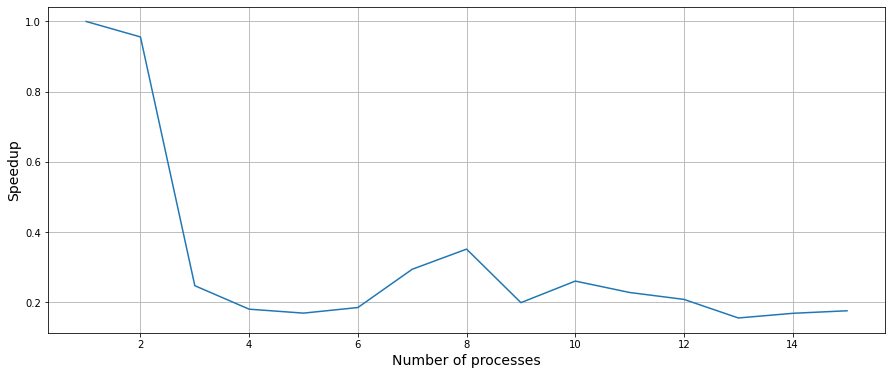

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(pr, bif_time[0] / np.array(bif_time))
plt.xlabel('Number of processes', size=14)
plt.ylabel('Speedup', size=14)
plt.grid(True);